<h1>Setup</h1>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

<h1>Prepare the data</h1>

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (56, 56, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h1>Build the model</h1>

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.GlobalMaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

2022-10-31 09:09:45.980355: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 128)       512       
_________________________________________________________________
global_max_pooling2d (Global (None, 128)               0

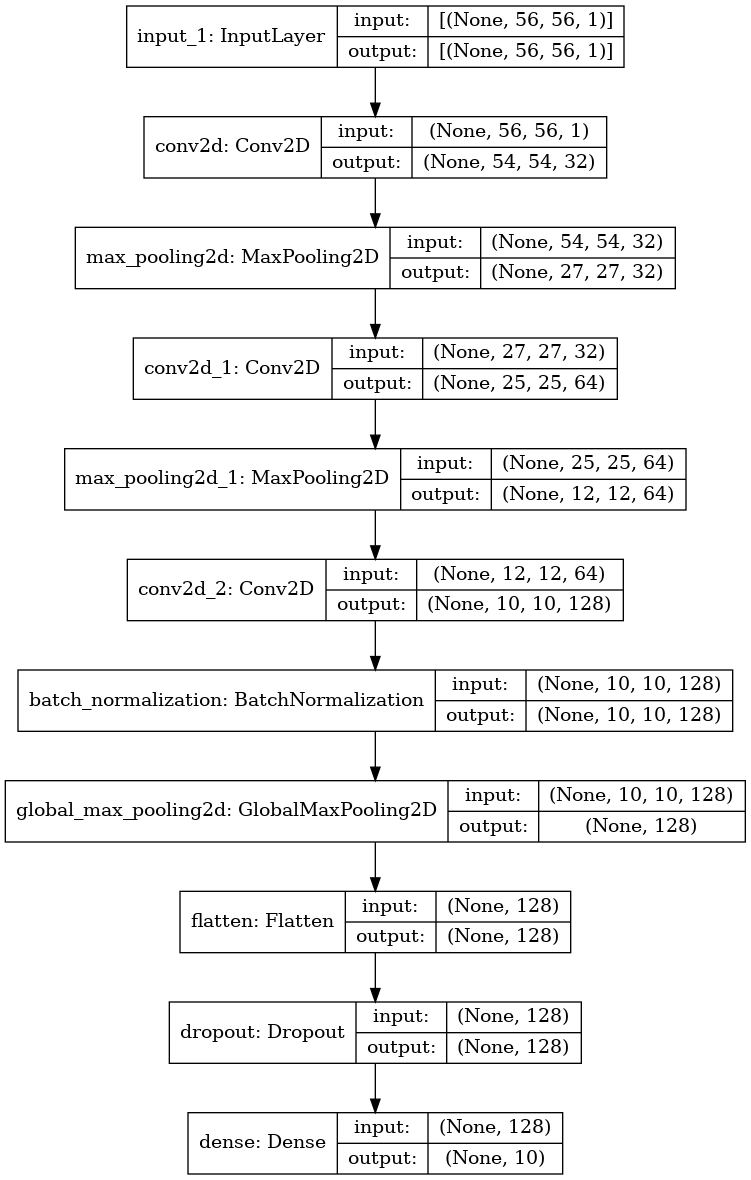

In [6]:
keras.utils.plot_model(model,show_shapes=True)

<h1>Train the model</h1>

In [7]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = "accuracy")

tensorboard = TensorBoard(log_dir="logs")

early_stp=EarlyStopping(monitor='val_accuracy',
                        mode='max', 
                        verbose=1, 
                        patience=20)
checkpoint = ModelCheckpoint('model.h5', 
                             monitor='val_accuracy', 
                             mode='Auto',
                             verbose=1,
                             save_best_only=True )

reduce_LR = ReduceLROnPlateau(monitor="val_accuracy", 
                             factor = 0.3, 
                             patience = 2, 
                             min_delta=0.001, 
                             mode = "auto", 
                            verbose = 1)

History=model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.1,callbacks=[checkpoint,early_stp,tensorboard,reduce_LR])


2022-10-31 09:09:47.643971: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-31 09:09:47.644317: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-31 09:09:47.645423: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-31 09:09:47.962368: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
  6/844 [..............................] - ETA: 30s - loss: 2.5520 - accuracy: 0.2630

2022-10-31 09:09:49.046249: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-31 09:09:49.046419: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-31 09:09:49.074887: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-31 09:09:49.083166: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-31 09:09:49.099339: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_10_31_09_09_49

2022-10-31 09:09:49.100707: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_10_31_09_09_49/a55b76524814.trace.json.gz
2022-10-31 09:09:49.117072: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_10_31_09_09_49

2022-10-31 09:09:49.118017: I

844/844 [==============================] - 23s 26ms/step - loss: 0.2873 - accuracy: 0.9097 - val_loss: 0.0493 - val_accuracy: 0.9842

Epoch 00001: val_accuracy improved from -inf to 0.98417, saving model to model.h5
Epoch 2/20
844/844 [==============================] - 22s 27ms/step - loss: 0.0883 - accuracy: 0.9742 - val_loss: 0.0429 - val_accuracy: 0.9863

Epoch 00002: val_accuracy improved from 0.98417 to 0.98633, saving model to model.h5
Epoch 3/20
844/844 [==============================] - 21s 25ms/step - loss: 0.0627 - accuracy: 0.9802 - val_loss: 0.0320 - val_accuracy: 0.9907

Epoch 00003: val_accuracy improved from 0.98633 to 0.99067, saving model to model.h5
Epoch 4/20
844/844 [==============================] - 22s 26ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0361 - val_accuracy: 0.9895

Epoch 00004: val_accuracy did not improve from 0.99067
Epoch 5/20
844/844 [==============================] - 23s 27ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.0336 - v

<h1>Evaluate the trained model</h1>

In [8]:
loss=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0195 - accuracy: 0.9941


In [9]:
print("Test loss:", round(loss[0]*100,2),'%')
print("Test accuracy:", round(loss[1]*100,2),'%')

Test loss: 1.95 %
Test accuracy: 99.41 %


<h1>Model performance reports:</h1>

In [10]:
x_test_fit=model.predict(x_test)
x_test_fit=np.argmax(x_test_fit,axis=1)
y_test=np.argmax(y_test,axis=1)

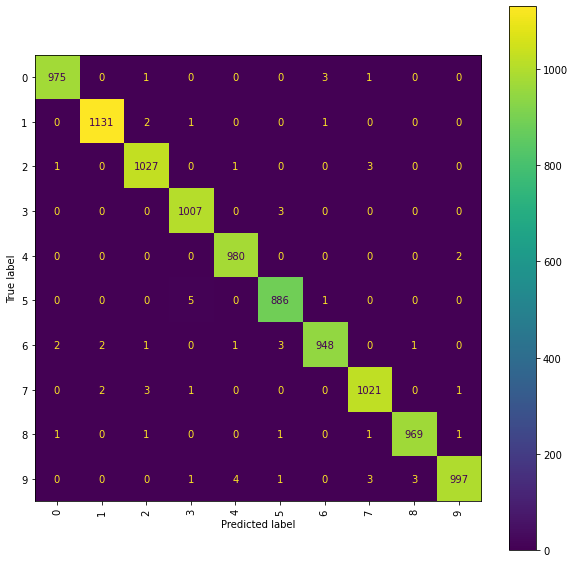

In [11]:
cm = confusion_matrix(y_test,x_test_fit)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax, xticks_rotation=90)

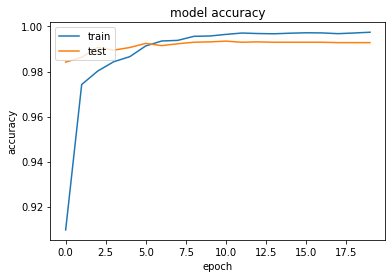

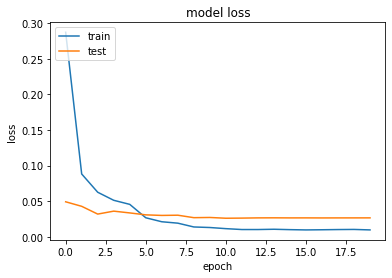

In [12]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()